### 1.0 Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [51]:
archivo_url = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/train.csv'

archivo = 'train.csv'

ds = pd.read_csv(archivo)

# dividing the dataset in test and train
from sklearn.model_selection import train_test_split

X = ds.loc[:, ds.columns != 'label']
y = ds['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

ds = pd.concat([X_train, y_train], axis=1)

ds_test = pd.concat([X_test, y_test], axis=1)

In [36]:
# archivo_url1 = 'https://raw.githubusercontent.com/NgoQuocBao1010/Exercise-Correction/main/core/plank_model/test.csv'
# 
# archivo = 'test.csv'
#     
# ds_test = pd.read_csv(archivo)
# 
# ds_test

### 1.2 Dataset preprocessing
Replacing high back and low back with 2 and 1 respectively and correct with 0

In [52]:
ds_test['label'] = ds_test['label'].replace('H', 2)
ds_test['label'] = ds_test['label'].replace('L', 1)
ds_test['label'] = ds_test['label'].replace('C', 0)

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_49341/3704822922.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [53]:
ds['label'] = ds['label'].replace('H', 2)
ds['label'] = ds['label'].replace('L', 1)
ds['label'] = ds['label'].replace('C', 0)

/var/folders/rb/h3rl5sw15s587zkvrd3b6wy40000gn/T/ipykernel_49341/1111045380.py:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



### 1.3 Exploratory Data Analysis

In [54]:
ds.columns

Index(['nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x',
       'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'right_shoulder_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z',
       'left_elbow_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z',
       'right_elbow_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z',
       'left_wrist_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'right_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v',
       'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v',
       'left_knee_x', 'left_knee_y', 'left_knee_z', 'left_knee_v',
       'right_knee_x', 'right_knee_y', 'right_knee_z', 'right_knee_v',
       'left_ankle_x', 'left_ankle_y', 'left_ankle_z', 'left_ankle_v',
       'right_ankle_x', 'right_ankle_y', 'right_ankle_z', 'right_ankle_v',
       'left_heel_x', 'left_heel_y', 'left_heel_z', 'left_heel_v',
       'ri

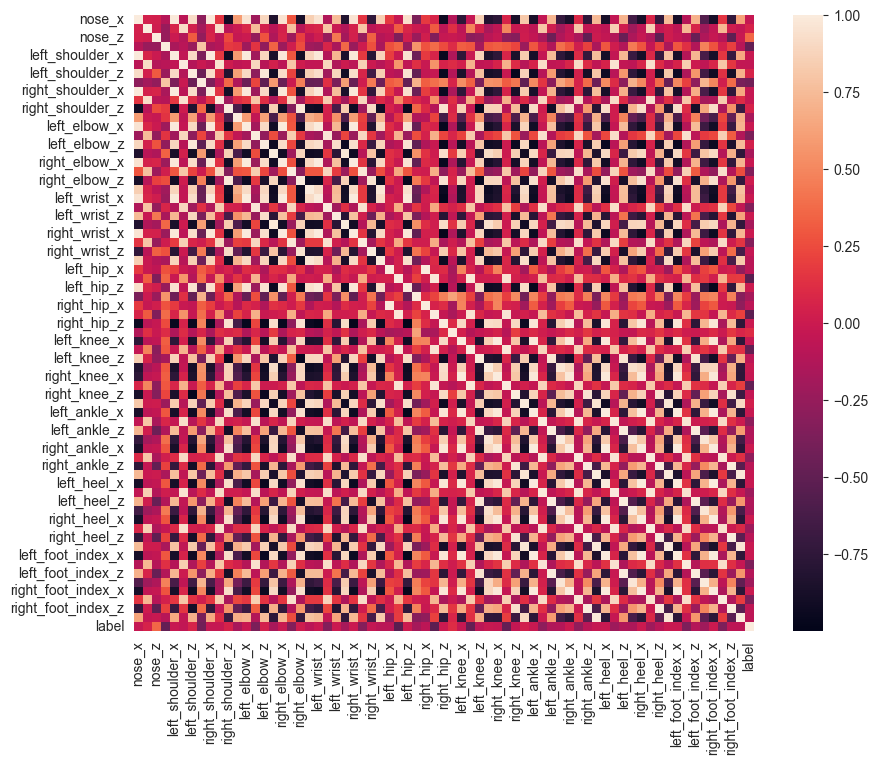

In [55]:
# dataset correlation matrix
cm = ds.corr()

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(cm, ax=ax)

plt.show()

In [56]:
ds["label"].value_counts()

label
0    2007
2    1935
1    1904
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='Count'>

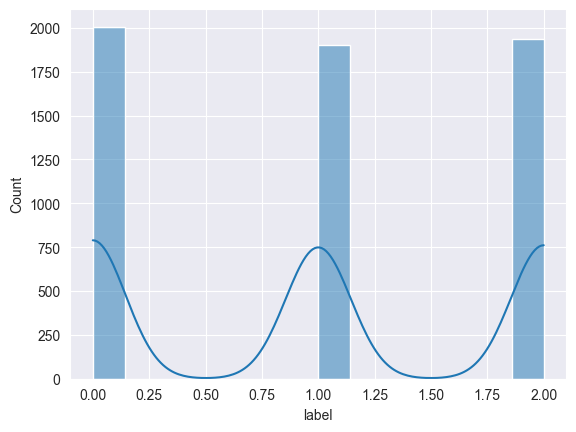

In [57]:
# plot the distribution of the target variable
sns.histplot(ds["label"], kde=True)

In [58]:
# sns.pairplot(ds, hue="label")

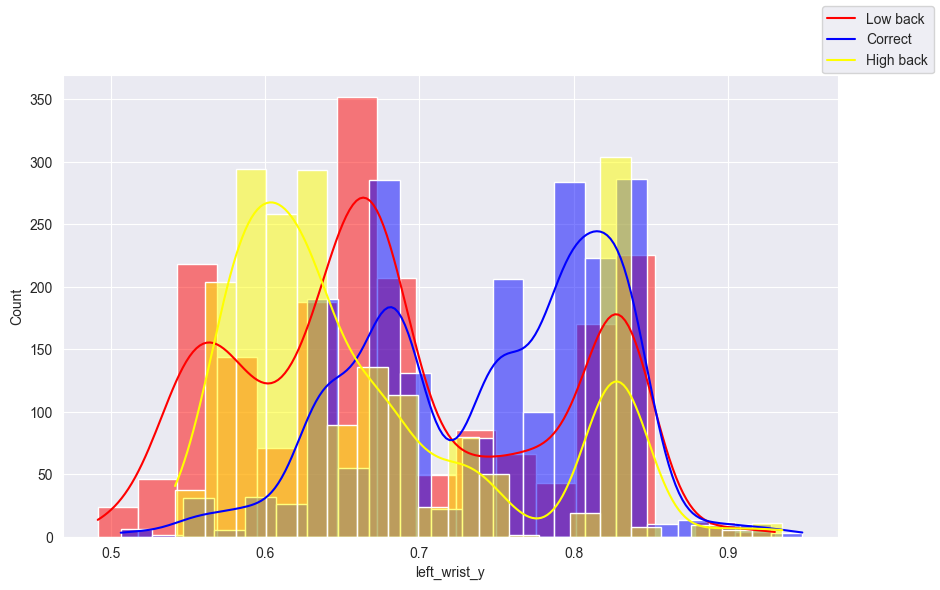

In [59]:
ds_true = ds[ds["label"] == 1]
ds_false = ds[ds["label"] == 0]
ds_two = ds[ds["label"] == 2]

fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(ds_true["left_wrist_y"], kde=True, color="red", ax=ax)
sns.histplot(ds_false["left_wrist_y"], kde=True, color="blue", ax=ax)
sns.histplot(ds_two["left_wrist_y"], kde=True, color="yellow", ax=ax)

fig.legend(labels=["Low back", "Correct", "High back"])

### 1.4 Data Modeling

In [65]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

/Users/defeee/Documents/GitHub/FormAI-ML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

### 1.5 Model Evaluation

In [66]:
# predict the target variable
y_pred = log_model.predict(ds_test.loc[:, ds_test.columns != 'label'])

Accuracy: 0.9923451932945604


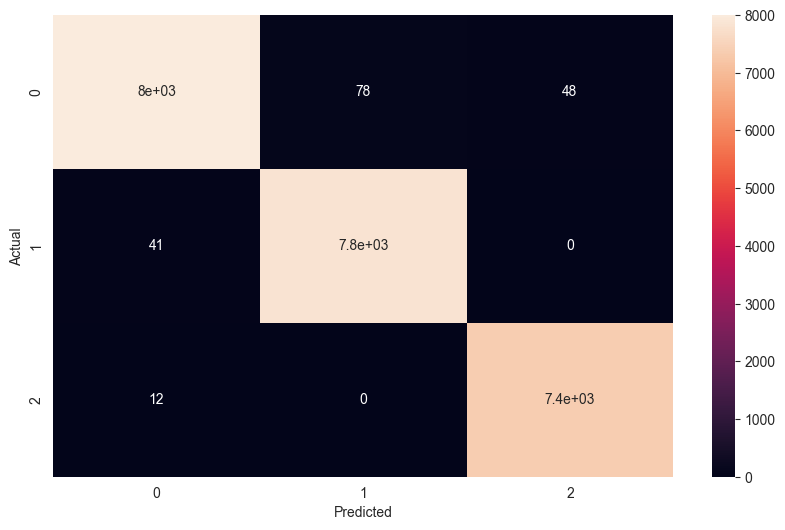

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# calculate the accuracy of the model

accuracy = accuracy_score(ds_test['label'], y_pred)
print("Accuracy:", accuracy)

# calculate the confusion matrix
cm = confusion_matrix(ds_test['label'], y_pred)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [68]:
from sklearn.metrics import classification_report

print(classification_report(ds_test['label'], y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      8131
           1       0.99      0.99      0.99      7877
           2       0.99      1.00      1.00      7376

    accuracy                           0.99     23384
   macro avg       0.99      0.99      0.99     23384
weighted avg       0.99      0.99      0.99     23384



### 1.6 Feature Scaling

Accuracy: 0.998460485802258
Precision:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8131
           1       1.00      1.00      1.00      7877
           2       1.00      1.00      1.00      7376

    accuracy                           1.00     23384
   macro avg       1.00      1.00      1.00     23384
weighted avg       1.00      1.00      1.00     23384



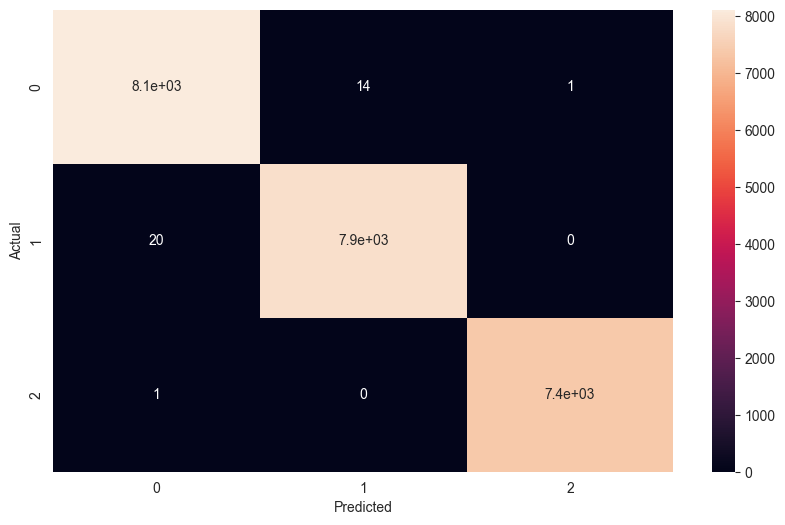

In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ("scaler", StandardScaler()), 
    ("logistic", LogisticRegression())
])

pipe.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

y_pred_scale = pipe.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_scale)
cm = confusion_matrix(ds_test['label'], y_pred_scale)

print("Accuracy:", accuracy)
print("Precision:", classification_report(ds_test['label'], y_pred_scale))

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

In [70]:
print("Coefficients:", log_model.coef_)
print("Intercept:", log_model.intercept_)

Coefficients: [[-5.19534040e-01 -1.14573554e+00 -1.86657128e+00 -9.67038200e-01
  -1.72345836e-01 -2.05427095e+00 -1.44247194e+00 -8.09980277e-01
   9.54409808e-01 -4.01914850e+00  7.58018727e-03 -1.07702106e+00
  -2.21425345e-01  3.71932619e+00  2.51021740e-01  4.98903882e+00
   6.28448803e-01  2.06812028e+00  9.42508974e-02  4.29667151e+00
   6.14487629e-02  3.70198104e+00  1.17059966e+00  2.62660450e+00
   2.20824833e-01  2.04733969e+00  2.13211572e+00 -1.09659273e+00
   1.39954189e-01  2.32365697e-01  4.85124448e-02 -1.04684150e+00
   5.30293781e-01 -1.76388557e+00 -4.47866402e-02 -1.08779273e+00
  -4.44475368e-01 -9.78510552e-01  5.98225771e-01 -3.78976406e+00
   1.84793750e-01 -1.76419338e+00  1.23976201e+00 -2.75486737e+00
  -1.57274269e-02 -1.87695954e-01  1.00753957e+00 -5.23963108e-01
  -6.63006795e-01 -8.99315722e-03  6.71749903e-01  4.58448578e-01
   4.41326888e-01  1.52718124e-01  9.09392489e-01 -1.37867296e+00
  -5.56326446e-01  3.74673824e-01  3.61528785e-01  8.92804180e

### 1.7 Feature Importance

<BarContainer object of 5 artists>

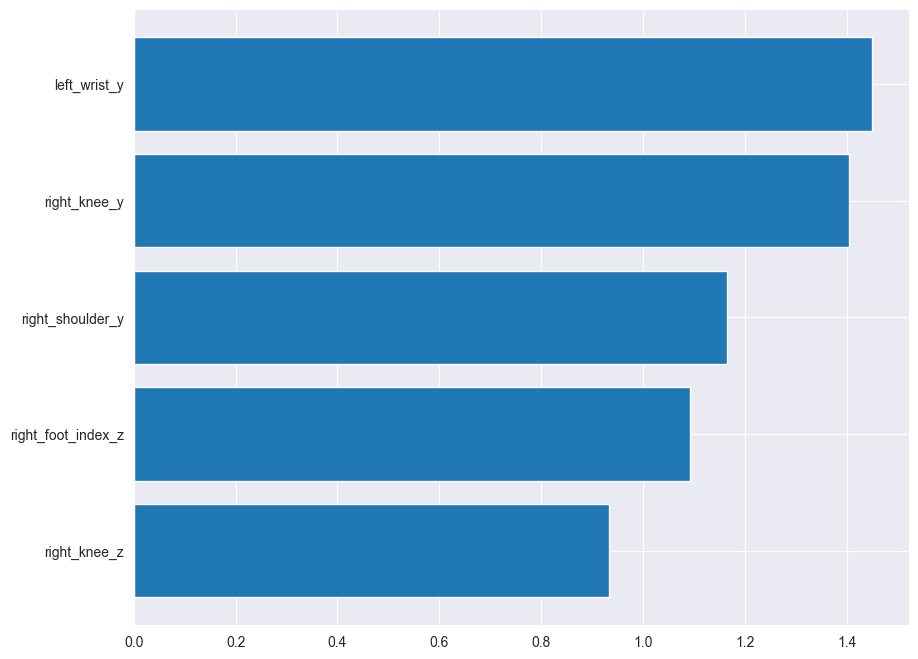

In [71]:
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": ds.loc[:, ds.columns != 'label'].columns, "coef": np.abs(pipe.named_steps["logistic"].coef_[0])}
).sort_values(by="coef", ascending=True).tail()

ax.barh(feature_importances["column"], feature_importances["coef"])

### 1.8 Hyperparameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "logistic__C": [0.1, 1, 10, 100, 1000],
    "logistic__penalty": ["l1", "l2"]
}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)



/Users/defeee/Documents/GitHub/FormAI-ML/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/defeee/Documents/GitHub/FormAI-ML/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/defeee/Documents/GitHub/FormAI-ML/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/defe

Best cross-validation score: 1.00
Best parameters:  {'logistic__C': 1, 'logistic__penalty': 'l2'}


### 2.0 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_tree = tree.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_tree)
cm = confusion_matrix(ds_test['label'], y_pred_tree)

print("Accuracy:", accuracy)

# plot confusion matrix 

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()



In [ ]:
# plot the feature importance
fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": ds.loc[:, ds.columns != 'label'].columns, "coef": tree.feature_importances_}
).sort_values(by="coef", ascending=True).tail()

ax.barh(feature_importances["column"], feature_importances["coef"])

plt.show()

In [ ]:
# plot the decision tree
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 10))

_ = plot_tree(tree, filled=True, ax=ax)

plt.show()

### 2.1 Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_forest = forest.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_forest)
cm = confusion_matrix(ds_test['label'], y_pred_forest)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

### 2.2 Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_gb = gb.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_gb)

cm = confusion_matrix(ds_test['label'], y_pred_gb)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

In [ ]:
# plot the feature importance
fig, ax = plt.subplots(figsize=(10, 8))

feature_importances = pd.DataFrame(
    {"column": ds.loc[:, ds.columns != 'label'].columns, "coef": gb.feature_importances_}
).sort_values(by="coef", ascending=True).tail()

ax.barh(feature_importances["column"], feature_importances["coef"])

plt.show()

In [ ]:
# plot the decision tree
fig, ax = plt.subplots(figsize=(20, 10))

_ = plot_tree(gb.estimators_[0][0], filled=True, ax=ax)

plt.show()

### 2.3 Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_svc = svc.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_svc)

cm = confusion_matrix(ds_test['label'], y_pred_svc)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

### 2.4 K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_knn = knn.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_knn)

cm = confusion_matrix(ds_test['label'], y_pred_knn)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

### 2.5 Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_nb = nb.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_nb)

cm = confusion_matrix(ds_test['label'], y_pred_nb)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

### 2.6 Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier()
nn.fit(ds.loc[:, ds.columns != 'label'], ds["label"].values.ravel())

y_pred_nn = nn.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_nn)

cm = confusion_matrix(ds_test['label'], y_pred_nn)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

In [31]:
# Enhance the model by tuning the hyperparameters
param_grid = {
    "hidden_layer_sizes": [(100,), (50,), (25,), (10,)],
    "activation": ["identity", "logistic", "tanh", "relu"]
}

grid = GridSearchCV(nn, param_grid, cv=5)
grid.fit(ds.loc[:, ds.columns != 'label'], ds['label'].values.ravel())

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 1.00
Best parameters:  {'activation': 'identity', 'hidden_layer_sizes': (25,)}


In [ ]:
# plot confusion matrix

y_pred_nn = grid.predict(ds_test.loc[:, ds_test.columns != 'label'])

accuracy = accuracy_score(ds_test['label'], y_pred_nn)

cm = confusion_matrix(ds_test['label'], y_pred_nn)

print("Accuracy:", accuracy)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)

_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()

### 3.0 Model Comparison graphical representation

In [34]:
models = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "Gradient Boosting",
    "SVM",
    "KNN",
    "Naive Bayes",
    "Neural Network"
]

accuracies = [
    accuracy_score(ds_test['label'], y_pred_scale),
    accuracy_score(ds_test['label'], y_pred_tree),
    accuracy_score(ds_test['label'], y_pred_forest),
    accuracy_score(ds_test['label'], y_pred_gb),
    accuracy_score(ds_test['label'], y_pred_svc),
    accuracy_score(ds_test['label'], y_pred_knn),
    accuracy_score(ds_test['label'], y_pred_nb),
    accuracy_score(ds_test['label'], y_pred_nn)
]

import plotly.graph_objects as go

accuracies, models = zip(*sorted(zip(accuracies, models)))

fig = go.Figure([go.Bar(x=models, y=accuracies, marker_color='rgb(55, 83, 109)')])

fig.update_layout(title_text='Models Comparison', xaxis_title="Models", yaxis_title="Accuracy")

fig.show()


In [ ]:
# plot the confusion matrix for the best model
cm = confusion_matrix(ds_test['label'], y_pred_scale)

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")

_ = plt.ylabel("Actual")

plt.show()

### 4.0 Model saving to pkl

In [77]:
from Models.Utilities.save import save_model

save_model(pipe, '/Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model.pkl')

Model saved to /Users/defeee/Documents/GitHub/FormAI-ML/Models/Core/Plank/model.pkl


In [75]:
## Testing model with new data

In [ ]:
archivo = '../Computer Vision/mediapipe to csv/pose_data.csv'

ds_new = pd.read_csv(archivo)

# replace the label column
ds_new['label'] = ds_new['label'].replace('H', 2)
ds_new['label'] = ds_new['label'].replace('L', 1)
ds_new['label'] = ds_new['label'].replace('C', 0)

ds_new

In [ ]:
# removing the label column
y_pred_new = pipe.predict(ds_new.loc[:, ds_new.columns != 'label'])


# show the accuracy of the model
accuracy = accuracy_score(ds_new['label'], y_pred_new)
cm = confusion_matrix(ds_new['label'], y_pred_new)

print("Accuracy:", accuracy)

# plot confusion matrix

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm, annot=True, ax=ax)
_ = plt.xlabel("Predicted")
_ = plt.ylabel("Actual")

plt.show()